In [1]:
import pandas as pd
from tech_core.feature_pipeline import FeaturesPipeline
from tech_core.losses import StreamingSharpeLoss
from tech_core.nn_builder import SimplePortfolioAllocator, DeepPortfolioAllocator_1
import torch
from tqdm import tqdm
# ??? Should we make different train periods for different models?

In [2]:
path_to_data = '../data/'

split_dates = [
    pd.Timestamp("2025-01-01")
]
split_names = ['train', 'test']

fee = 1.53e-4
padding = 35
batch_size_config = {
    0: 1000,
    # 40: 4000,
    # 80: 10000
}
num_epochs = 200
adam_lr = 1e-1
log_freq = 5

In [3]:
prev_models = []

batch_size = batch_size_config[0]
pipeline = FeaturesPipeline(
    path_to_data,
    padding=padding,
    batch_size=batch_size,
    split_dates=split_dates,
    split_names=split_names
)

cmf_dim = asset_dim = num_assets = None
for common_feats, asset_feats, fut_ret, _, _ in tqdm(pipeline.iterate('train'), desc="Loading features"):
    cmf_dim = common_feats.shape[1]
    asset_dim = asset_feats.shape[2]
    num_assets = asset_feats.shape[1]
    break
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Loading features: 0it [00:00, ?it/s]


  0%|          | 0/200 [00:00<?, ?it/s]

Changing batch size to 1000 at epoch 0


  2%|▏         | 4/200 [03:27<2:45:58, 50.81s/it]

Sharpe Ratio for the epoch: 1.2692
Average Weights:



,Weight
Cash,5.585041e-01
MPWR,4.123112e-01
MTD,2.510000e-02
FICO,3.471704e-03
BKNG,6.127600e-04
...,...
MO,2.143337e-14
BBY,2.112140e-14
MCD,1.852680e-14
ZBH,1.719121e-14


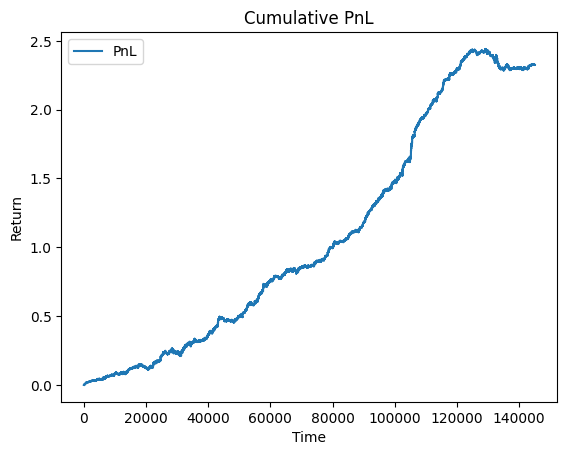

Epoch 5: Loss = 0.037348728626966476
Sharpe Ratio for the epoch: 2.1033
Average Weights:



,Weight
Cash,8.240114e-01
MPWR,1.493597e-01
MTD,2.411074e-02
FICO,2.064014e-03
BKNG,4.542067e-04
...,...
MO,1.252139e-14
BBY,1.228508e-14
MCD,1.079619e-14
ZBH,1.002978e-14


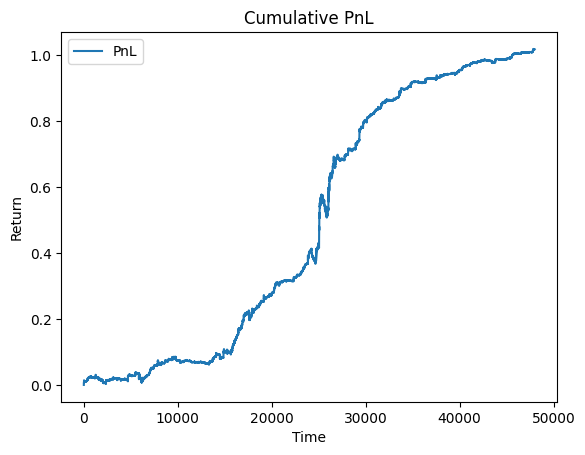

  4%|▍         | 9/200 [07:35<2:37:50, 49.58s/it]

Sharpe Ratio for the epoch: 1.4193
Average Weights:



,Weight
Cash,5.595774e-01
MPWR,4.208786e-01
MTD,1.857200e-02
FICO,8.153912e-04
BKNG,1.567558e-04
...,...
MO,1.709538e-14
BBY,1.684699e-14
MCD,1.478124e-14
ZBH,1.371715e-14


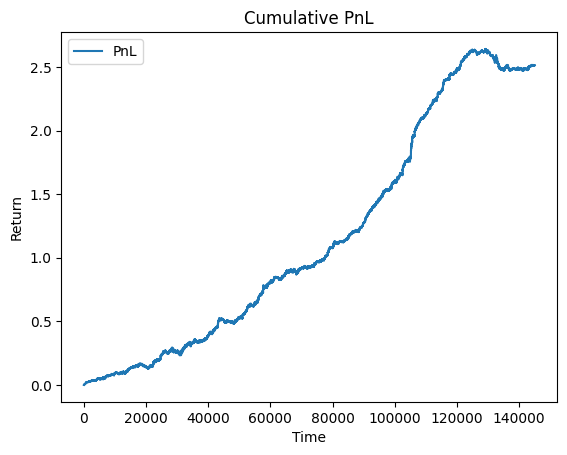

Epoch 10: Loss = 0.06987340748310089
Sharpe Ratio for the epoch: 2.3211
Average Weights:



,Weight
Cash,8.133988e-01
MPWR,1.613702e-01
MTD,2.448551e-02
FICO,6.161239e-04
BKNG,1.294487e-04
...,...
MO,1.094306e-14
BBY,1.073676e-14
MCD,9.437964e-15
ZBH,8.768919e-15


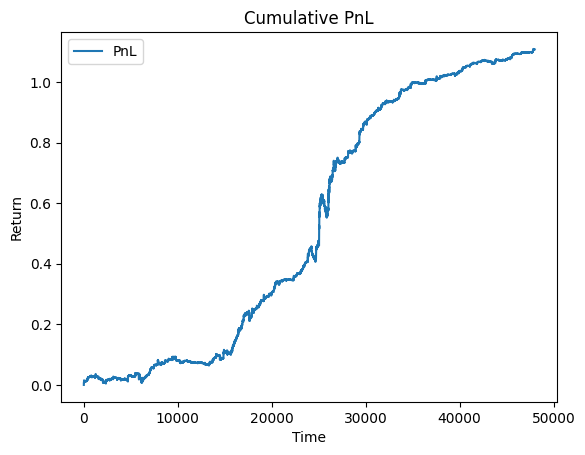

  7%|▋         | 14/200 [11:41<2:32:51, 49.31s/it]

Sharpe Ratio for the epoch: 1.5182
Average Weights:



,Weight
Cash,5.449700e-01
MPWR,4.409288e-01
MTD,1.374893e-02
FICO,2.952140e-04
BKNG,5.714970e-05
...,...
MO,1.511786e-14
BBY,1.489888e-14
MCD,1.307501e-14
ZBH,1.213492e-14


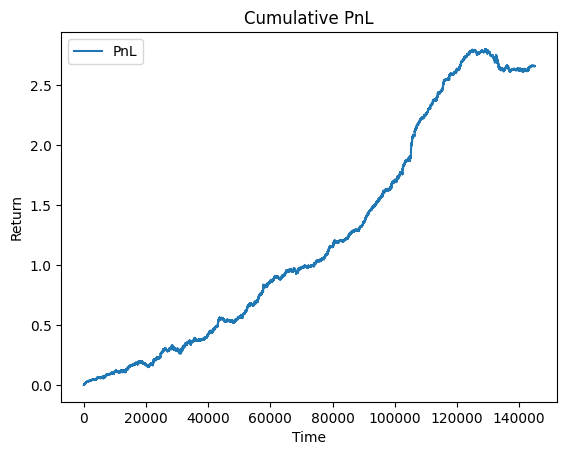

Epoch 15: Loss = 0.09183256328105927
Sharpe Ratio for the epoch: 2.6817
Average Weights:



,Weight
Cash,7.840163e-01
MPWR,1.926912e-01
MTD,2.298440e-02
FICO,2.562109e-04
BKNG,5.186090e-05
...,...
MO,1.072591e-14
BBY,1.052563e-14
MCD,9.253936e-15
ZBH,8.598386e-15


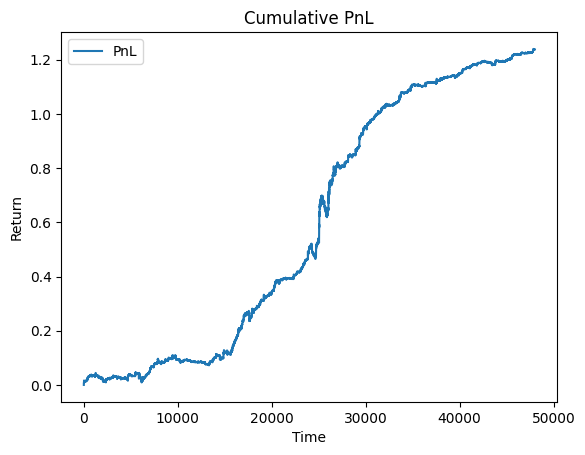

 10%|▉         | 19/200 [15:42<2:25:48, 48.33s/it]

Sharpe Ratio for the epoch: 1.5863
Average Weights:



,Weight
Cash,5.225903e-01
MPWR,4.671763e-01
MTD,1.008252e-02
FICO,1.260203e-04
BKNG,2.494403e-05
...,...
MO,1.381251e-14
BBY,1.361318e-14
MCD,1.194886e-14
ZBH,1.109110e-14


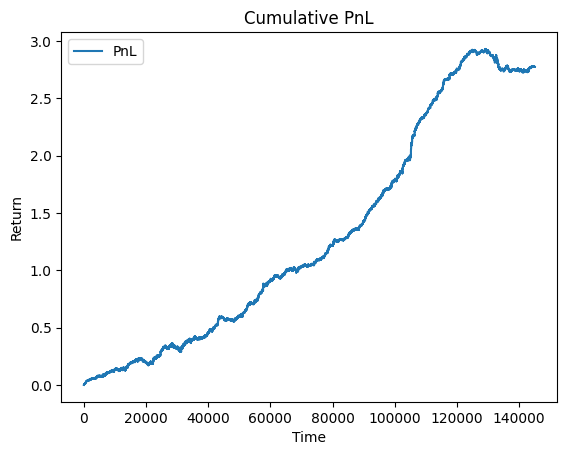

Epoch 20: Loss = 0.0884491503238678
Sharpe Ratio for the epoch: 3.1327
Average Weights:



,Weight
Cash,7.414622e-01
MPWR,2.374278e-01
MTD,2.096312e-02
FICO,1.221621e-04
BKNG,2.472105e-05
...,...
MO,1.091362e-14
BBY,1.071263e-14
MCD,9.419142e-15
ZBH,8.752350e-15


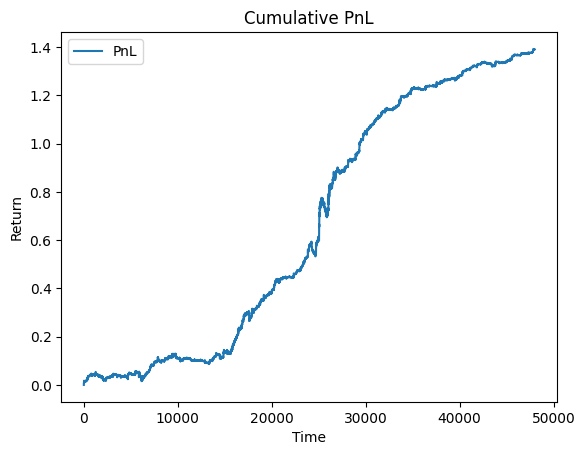

 12%|█▏        | 24/200 [19:43<2:21:35, 48.27s/it]

Sharpe Ratio for the epoch: 1.6440
Average Weights:



,Weight
Cash,5.029261e-01
MPWR,4.892365e-01
MTD,7.764996e-03
FICO,6.003882e-05
BKNG,1.228921e-05
...,...
MO,1.285941e-14
BBY,1.267461e-14
MCD,1.112699e-14
ZBH,1.032949e-14


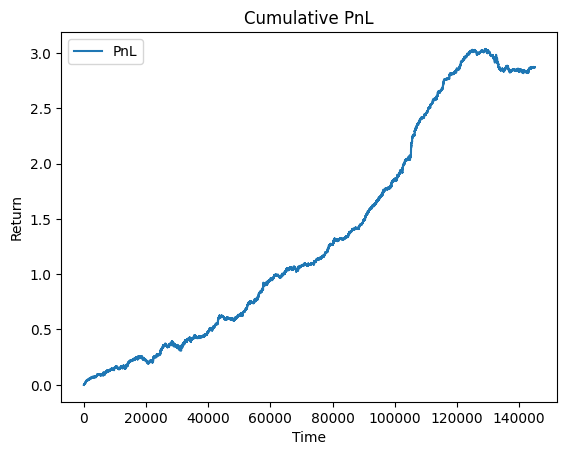

Epoch 25: Loss = 0.07049164921045303
Sharpe Ratio for the epoch: 3.5202
Average Weights:



,Weight
Cash,7.010458e-01
MPWR,2.797582e-01
MTD,1.912048e-02
FICO,6.259512e-05
BKNG,1.294671e-05
...,...
MO,1.097798e-14
BBY,1.077822e-14
MCD,9.477764e-15
ZBH,8.807337e-15


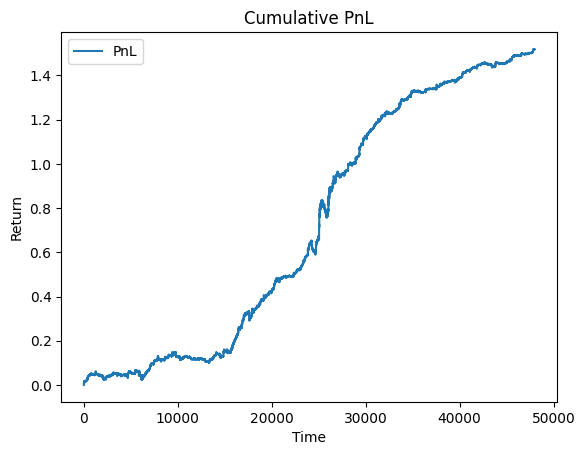

 14%|█▍        | 29/200 [23:44<2:17:01, 48.08s/it]

Sharpe Ratio for the epoch: 1.6998
Average Weights:



,Weight
MPWR,5.023521e-01
Cash,4.912204e-01
MTD,6.389676e-03
FICO,3.126464e-05
BKNG,6.647307e-06
...,...
MO,1.216042e-14
BBY,1.198648e-14
MCD,1.052481e-14
ZBH,9.771528e-15


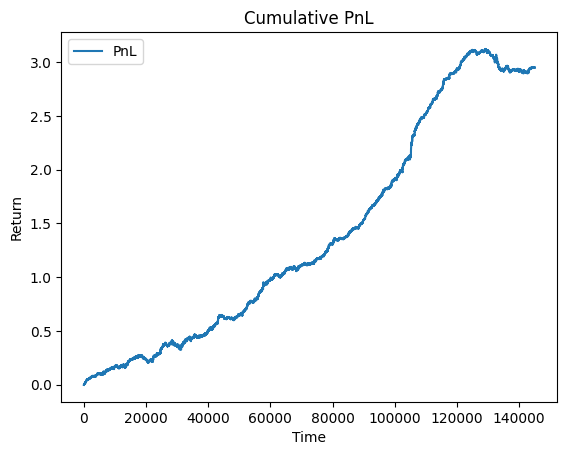

Epoch 30: Loss = 0.056593041867017746
Sharpe Ratio for the epoch: 3.7807
Average Weights:



,Weight
Cash,6.725025e-01
MPWR,3.095852e-01
MTD,1.787126e-02
FICO,3.390059e-05
BKNG,7.243222e-06
...,...
MO,1.084132e-14
BBY,1.064578e-14
MCD,9.362568e-15
ZBH,8.700906e-15


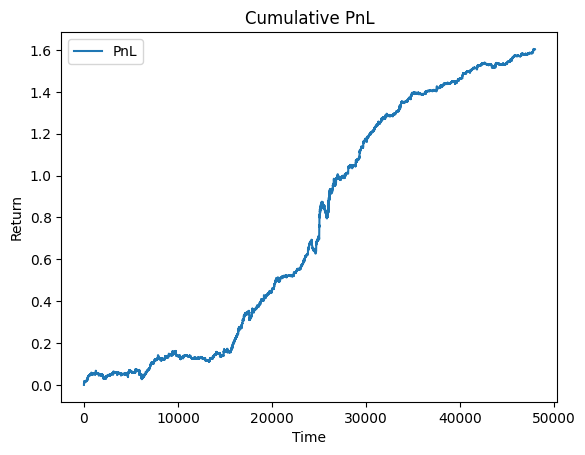

 17%|█▋        | 34/200 [27:44<2:12:52, 48.03s/it]

Sharpe Ratio for the epoch: 1.7510
Average Weights:



,Weight
MPWR,5.108443e-01
Cash,4.836490e-01
MTD,5.485512e-03
FICO,1.733281e-05
BKNG,3.841525e-06
...,...
MO,1.161298e-14
BBY,1.144765e-14
MCD,1.005356e-14
ZBH,9.334929e-15


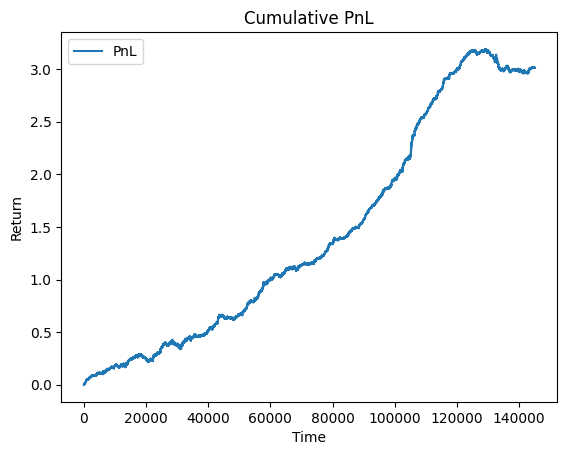

Epoch 35: Loss = 0.046017810702323914
Sharpe Ratio for the epoch: 3.9684
Average Weights:



,Weight
Cash,6.513472e-01
MPWR,3.314977e-01
MTD,1.713173e-02
FICO,1.922731e-05
BKNG,4.269781e-06
...,...
MO,1.063491e-14
BBY,1.044445e-14
MCD,9.186933e-15
ZBH,8.538285e-15


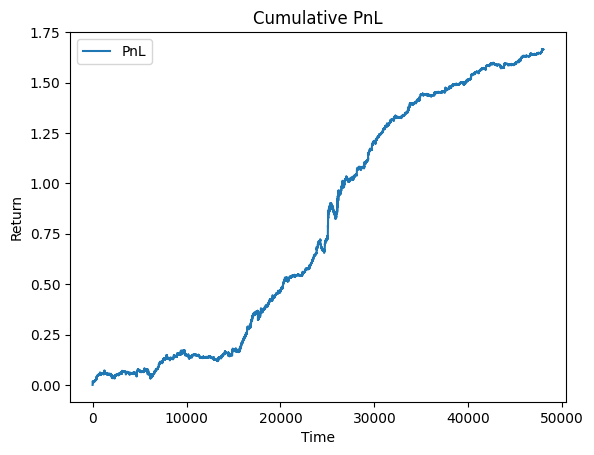

 20%|█▉        | 39/200 [31:55<2:15:12, 50.39s/it]

Sharpe Ratio for the epoch: 1.7993
Average Weights:



,Weight
MPWR,5.154333e-01
Cash,4.796985e-01
MTD,4.855843e-03
FICO,1.004218e-05
BKNG,2.324389e-06
...,...
MO,1.115866e-14
BBY,1.100072e-14
MCD,9.662855e-15
ZBH,8.972978e-15


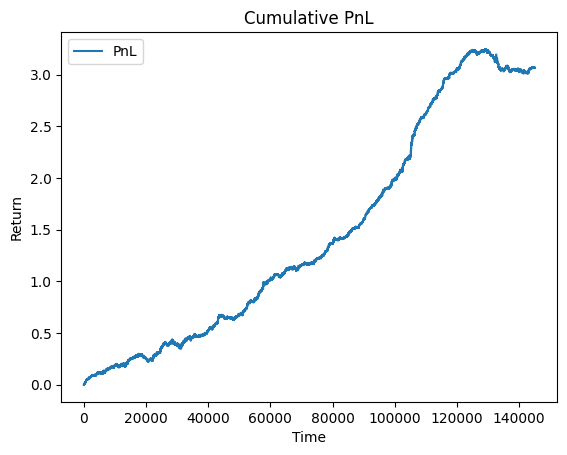

Epoch 40: Loss = 0.045113202184438705
Sharpe Ratio for the epoch: 4.0708
Average Weights:



,Weight
Cash,6.417882e-01
MPWR,3.414911e-01
MTD,1.670684e-02
FICO,1.127878e-05
BKNG,2.611376e-06
...,...
MO,1.034719e-14
BBY,1.016309e-14
MCD,8.940991e-15
ZBH,8.310405e-15


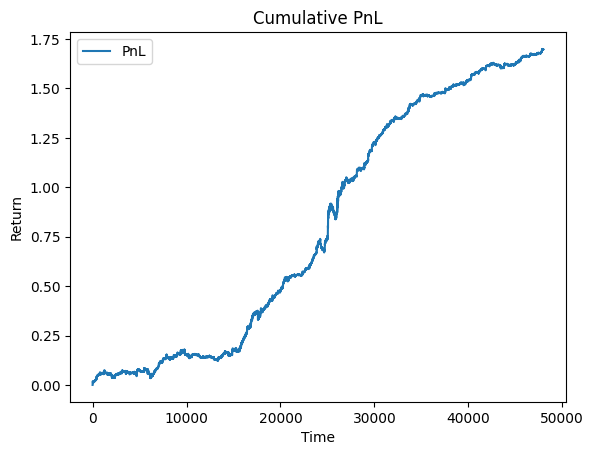

 22%|██▏       | 44/200 [36:03<2:09:16, 49.72s/it]

Sharpe Ratio for the epoch: 1.8439
Average Weights:



,Weight
MPWR,5.178078e-01
Cash,4.777877e-01
MTD,4.396997e-03
FICO,6.009039e-06
BKNG,1.451594e-06
...,...
MO,1.076607e-14
BBY,1.061470e-14
MCD,9.325677e-15
ZBH,8.660591e-15


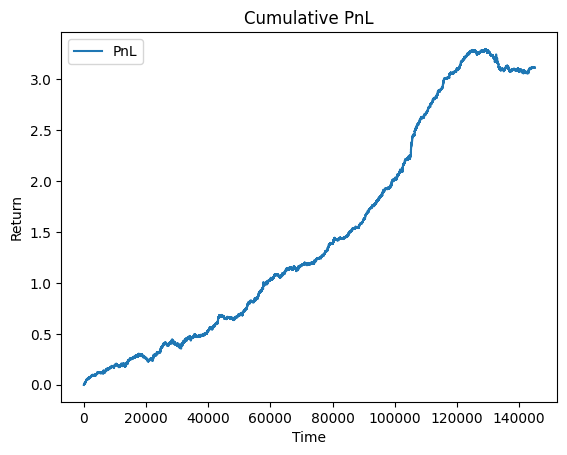

Epoch 45: Loss = 0.05012994632124901
Sharpe Ratio for the epoch: 4.1227
Average Weights:



,Weight
Cash,6.391762e-01
MPWR,3.443460e-01
MTD,1.646947e-02
FICO,6.800761e-06
BKNG,1.641351e-06
...,...
MO,1.003827e-14
BBY,9.860873e-15
MCD,8.676817e-15
ZBH,8.065549e-15


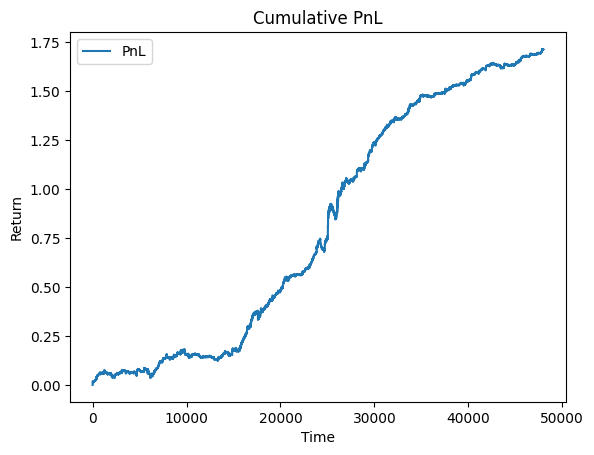

 24%|██▍       | 49/200 [40:19<2:05:18, 49.79s/it]

Sharpe Ratio for the epoch: 1.8848
Average Weights:



,Weight
MPWR,5.185479e-01
Cash,4.773758e-01
MTD,4.071744e-03
FICO,3.683929e-06
BKNG,9.269679e-07
...,...
MO,1.041918e-14
BBY,1.027368e-14
MCD,9.027931e-15
ZBH,8.384894e-15


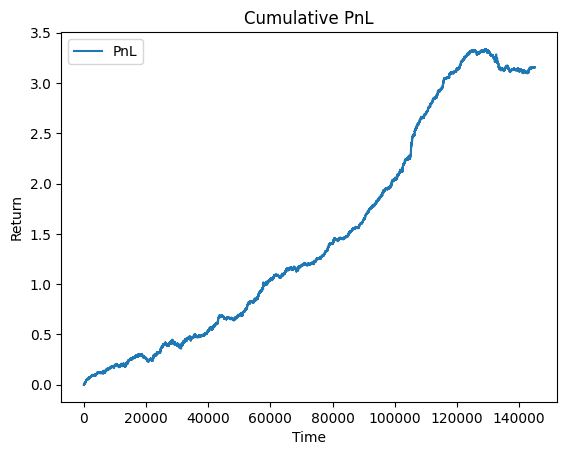

Epoch 50: Loss = 0.06219814717769623
Sharpe Ratio for the epoch: 4.1286
Average Weights:



,Weight
Cash,6.424875e-01
MPWR,3.411236e-01
MTD,1.638365e-02
FICO,4.189555e-06
BKNG,1.052247e-06
...,...
MO,9.720060e-15
BBY,9.549359e-15
MCD,8.404423e-15
ZBH,7.813200e-15


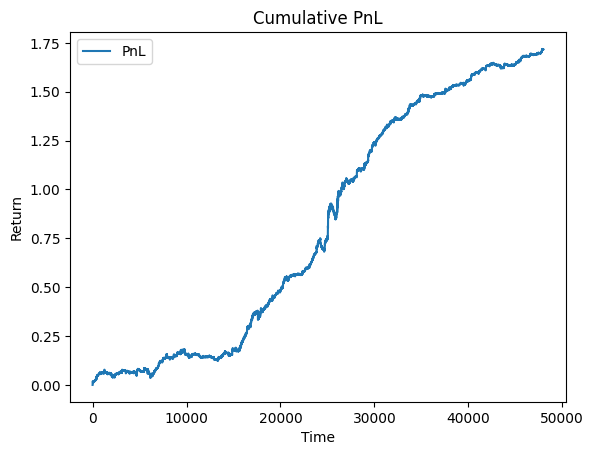

 27%|██▋       | 54/200 [44:51<2:01:16, 49.84s/it]


KeyboardInterrupt: 

In [5]:
from copy import deepcopy

loss_fn = StreamingSharpeLoss(
    fee=fee,
    asset_names=pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
)

m0_path = 'model_iteration_0_epoch_200.pth'

prev_models = []
for i in range(len(prev_models), 10):

    # ad-hoc so far, mb add this to pipeline
    train_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('train'):

        # Перевод в тензоры
        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)       # (T, d_common)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]

        train_cash_left.append(cash_left.detach())
    
    test_cash_left = []
    for common_feats_old, asset_feats, fut_ret, min_prices, market_caps in pipeline.iterate('test'):

        common_feats = torch.tensor(common_feats_old.values, dtype=torch.float32).to(device)
        asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
        fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
        min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
        market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)
        
        if len(common_feats) != batch_size:
            continue

        cash_left = torch.ones((common_feats.shape[0], 1), dtype=torch.float32, device=device)  # (T, 1)
        for prev_model in prev_models:
            common_feats_tmp = common_feats_old.copy()
            common_feats_tmp['cash_left'] = cash_left.detach().numpy()
            common_feats_tmp = torch.tensor(common_feats_tmp.values, dtype=torch.float32).to(device)
            cash_left *= prev_model(common_feats_tmp, asset_feats)[:, -1:]
        test_cash_left.append(cash_left.detach())

    model = SimplePortfolioAllocator(
        cmf_dim=cmf_dim + 1,
        num_assets=num_assets,
    ).to(device)
    model.load_state_dict(torch.load(m0_path, map_location=device))

    optimizer = torch.optim.Adam(model.parameters(), lr=adam_lr)

    for epoch in tqdm(range(num_epochs)):
        if epoch in batch_size_config:
            print(f"Changing batch size to {batch_size_config[epoch]} at epoch {epoch}")
            batch_size = batch_size_config[epoch]
            pipeline = FeaturesPipeline(
                path_to_data,
                padding=padding,
                batch_size=batch_size,
                split_dates=split_dates,
                split_names=split_names
            )

        if epoch == 0:
            loss_fn = StreamingSharpeLoss(
                fee=fee,
                asset_names=pipeline.reader.asset_names + ['Cash'],  # Добавляем Cash в список активов
                is_sharpe=False  # Меняем на не-шарп
            )

        loss_fn.reset()
        pipeline.reset()
        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('train'), train_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            # Перевод в тензоры
            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)       # (T, d_common)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)       # (T, n_assets, d_asset)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)       # (T, n_assets)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)       # (T, n_assets)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)       # (T, n_assets)

            if len(common_feats) != batch_size:
                continue

            optimizer.zero_grad()

            # Вычисляем веса
            weights = model(common_feats, asset_feats)

            # Обновляем метрику
            loss_value = loss_fn.forward(
                weights=weights,
                returns=fut_ret,
                prev_model_cash=cash_left,
                min_prices=min_prices,
                market_caps=market_caps
            )
            loss_value.backward()

            optimizer.step()

        if (epoch + 1) % log_freq == 0:
            _, weights_df = loss_fn.plot_whole_epoch_loss()
            weights_df.to_csv(f'weights_iteration_{i}_epoch_{epoch + 1}.csv')
            torch.save(model.state_dict(), f'model_iteration_{i}_epoch_{epoch + 1}.pth')
            print(f"Epoch {epoch + 1}: Loss = {loss_value.item()}")
        loss_fn.reset()  # Сбрасываем метрику для следующей эпохи

        for (common_feats, asset_feats, fut_ret, min_prices, market_caps), cash_left in zip(pipeline.iterate('test'), test_cash_left):

            common_feats['cash_left'] = cash_left.squeeze()  # Добавляем cash_left в общие признаки

            common_feats = torch.tensor(common_feats.values, dtype=torch.float32).to(device)
            asset_feats  = torch.tensor(asset_feats,         dtype=torch.float32).to(device)
            fut_ret      = torch.tensor(fut_ret.values,      dtype=torch.float32).to(device)
            min_prices  = torch.tensor(min_prices.values,   dtype=torch.float32).to(device)
            market_caps = torch.tensor(market_caps.values,  dtype=torch.float32).to(device)

            if len(common_feats) !=  batch_size:
                continue

            weights = model(common_feats, asset_feats)
            loss_fn.forward(weights=weights, returns=fut_ret, prev_model_cash=cash_left, min_prices=min_prices, market_caps=market_caps)

        if (epoch + 1) % log_freq == 0:
            loss_fn.plot_whole_epoch_loss()
        loss_fn.reset()

    prev_models.append(deepcopy(model))
    print(f"Iteration {i + 1} completed.")